In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


# Reading in Datasets

In [2]:
# Read the data into a Pandas DataFrame
ardd_fatal_crashes_df = pd.read_excel('ardd_fatal_crashes.xlsx')
ardd_fatal_crashes_df.head()


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number of Fatalities,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,National Remoteness Areas,SA4 Name 2021,National LGA NAme 2021,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day
0,20235016,WA,9,2023,Wednesday,17:10:00,Single,3,No,No,No,70,NaN,NaN,NaN,NaN,No,No,Weekday,Day
1,20231205,NSW,9,2023,Saturday,00:01:00,Single,1,No,No,No,100,Outer Regional Australia,Murray,Murray River,Arterial Road,No,No,Weekend,Night
2,20233054,Qld,9,2023,Saturday,23:00:00,Single,1,No,No,No,80,Major Cities of Australia,Gold Coast,Gold Coast,Sub-arterial Road,No,No,Weekend,Night
3,20237013,NT,9,2023,Friday,NaN,Multiple,6,No,No,Yes,-9,NaN,NaN,NaN,NaN,No,No,Weekend,Night
4,20237008,NT,9,2023,Saturday,NaN,NaN,2,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,No,No,Weekend,Night


In [3]:
# Read the data into a Pandas DataFrame
ardd_fatalities_df = pd.read_excel('ardd_fatalities.xlsx')
ardd_fatalities_df.head()


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20231104,NSW,9,2023,Friday,21:20:00,Multiple,No,No,No,...,15,Major Cities of Australia,Sydney - South West,Liverpool,Local Road,No,No,0_to_16,Weekend,Night
1,20233094,Qld,9,2023,Sunday,18:00:00,Multiple,No,No,Yes,...,25,Major Cities of Australia,Ipswich,Ipswich,National or State Highway,No,No,17_to_25,Weekend,Night
2,20232012,Vic,9,2023,Sunday,01:22:00,Multiple,-9,-9,-9,...,18,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Night
3,20231104,NSW,9,2023,Friday,21:20:00,Multiple,No,No,No,...,24,Major Cities of Australia,Sydney - South West,Liverpool,Local Road,No,No,17_to_25,Weekend,Night
4,20233075,Qld,9,2023,Saturday,20:00:00,Single,No,No,No,...,19,Inner Regional Australia,Wide Bay,Gympie,Sub-arterial Road,No,No,17_to_25,Weekend,Night


In [13]:
# Get a brief summary of the ardd_fatal_crashes DataFrame.
ardd_fatal_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49814 entries, 0 to 49813
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       49814 non-null  int64 
 1   State                          49814 non-null  object
 2   Month                          49814 non-null  int64 
 3   Year                           49814 non-null  int64 
 4   Dayweek                        49814 non-null  object
 5   Time                           49772 non-null  object
 6   Crash Type                     49810 non-null  object
 7   Number of Fatalities           49814 non-null  int64 
 8   Bus Involvement                49811 non-null  object
 9   Heavy Rigid Truck Involvement  49811 non-null  object
 10  Articulated Truck Involvement  49811 non-null  object
 11  Speed Limit                    49814 non-null  object
 12  National Remoteness Areas      10494 non-null  object
 13  S

In [14]:
# Get a brief summary of the ardd_fatalities DataFrame.
ardd_fatalities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55264 entries, 0 to 55263
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       55264 non-null  int64 
 1   State                          55264 non-null  object
 2   Month                          55264 non-null  int64 
 3   Year                           55264 non-null  int64 
 4   Dayweek                        55264 non-null  object
 5   Time                           55212 non-null  object
 6   Crash Type                     55259 non-null  object
 7   Bus Involvement                55260 non-null  object
 8   Heavy Rigid Truck Involvement  55260 non-null  object
 9   Articulated Truck Involvement  55260 non-null  object
 10  Speed Limit                    55264 non-null  object
 11  Road User                      55264 non-null  object
 12  Gender                         55264 non-null  object
 13  A

In [15]:
# Get the ardd_fatal_crashes_df columns.
ardd_fatal_crashes_df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Number of Fatalities', 'Bus Involvement',
       'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement',
       'Speed Limit', 'National Remoteness Areas', 'SA4 Name 2021',
       'National LGA NAme 2021', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Day of week', 'Time of Day'],
      dtype='object')

In [17]:
# Get the ardd_fatalities_df columns.
ardd_fatalities_df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2021',
       'National LGA Name 2021', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of day'],
      dtype='object')

In [19]:
ardd_fatalities_df = ardd_fatalities_df.drop(['State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type', 'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'National Remoteness Areas', 'SA4 Name 2021',
       'National LGA Name 2021', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Day of week', 'Time of day'], axis=1)


In [21]:
# Get the ardd_fatalities_df columns.
ardd_fatalities_df.columns

Index(['Crash ID', 'Road User', 'Gender', 'Age', 'Age Group'], dtype='object')

# Merging Datasets

In [22]:
# Merge the dataframes
merged_df = pd.merge(ardd_fatal_crashes_df, ardd_fatalities_df, on='Crash ID', how='inner')


In [23]:
# Get the merged_df columns.
merged_df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Number of Fatalities', 'Bus Involvement',
       'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement',
       'Speed Limit', 'National Remoteness Areas', 'SA4 Name 2021',
       'National LGA NAme 2021', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Day of week', 'Time of Day', 'Road User', 'Gender',
       'Age', 'Age Group'],
      dtype='object')

In [24]:
# Get a brief summary of the merged DataFrame.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55264 entries, 0 to 55263
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       55264 non-null  int64 
 1   State                          55264 non-null  object
 2   Month                          55264 non-null  int64 
 3   Year                           55264 non-null  int64 
 4   Dayweek                        55264 non-null  object
 5   Time                           55212 non-null  object
 6   Crash Type                     55259 non-null  object
 7   Number of Fatalities           55264 non-null  int64 
 8   Bus Involvement                55260 non-null  object
 9   Heavy Rigid Truck Involvement  55260 non-null  object
 10  Articulated Truck Involvement  55260 non-null  object
 11  Speed Limit                    55264 non-null  object
 12  National Remoteness Areas      11371 non-null  object
 13  S

In [33]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 24)
merged_df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number of Fatalities,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,National Remoteness Areas,SA4 Name 2021,National LGA NAme 2021,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day,Road User,Gender,Age,Age Group
0,20235016,WA,9,2023,Wednesday,17:10:00,Single,3,No,No,No,70,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Passenger,Male,24,17_to_25
1,20235016,WA,9,2023,Wednesday,17:10:00,Single,3,No,No,No,70,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Driver,Male,24,17_to_25
2,20235016,WA,9,2023,Wednesday,17:10:00,Single,3,No,No,No,70,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Passenger,Male,21,17_to_25
3,20231205,NSW,9,2023,Saturday,00:01:00,Single,1,No,No,No,100,Outer Regional Australia,Murray,Murray River,Arterial Road,No,No,Weekend,Night,Driver,Male,20,17_to_25
4,20233054,Qld,9,2023,Saturday,23:00:00,Single,1,No,No,No,80,Major Cities of Australia,Gold Coast,Gold Coast,Sub-arterial Road,No,No,Weekend,Night,Driver,Male,25,17_to_25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55259,19892548,Vic,1,1989,Sunday,01:00:00,Multiple,1,No,No,No,60,NaN,NaN,NaN,NaN,No,No,Weekend,Night,Pedestrian,Male,23,17_to_25
55260,19891122,NSW,1,1989,Tuesday,14:10:00,Multiple,1,No,-9,No,60,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Pedestrian,Male,71,65_to_74
55261,19894151,SA,1,1989,Wednesday,11:45:00,Multiple,1,No,-9,No,60,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Pedestrian,Male,73,65_to_74
55262,19892576,Vic,1,1989,Friday,17:15:00,Multiple,1,No,No,No,60,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Pedestrian,Female,6,0_to_16


# Data Cleaning - Removing unique values.

In [63]:
# Create an empty dictionary to store unique values for each column
unique_values = {}

# Loop through the columns and find unique values
for column in merged_df.columns:
    unique_values[column] = merged_df[column].unique()

# Display unique values for each column
for column, values in unique_values.items():
    print(f'Column: {column}')
    print(values)
    print('\n')
    

Column: Crash ID
[20235016 20231205 20233054 ... 19894151 19892576 19893326]


Column: State
['WA' 'NSW' 'Qld' 'NT' 'Vic' 'SA' 'Tas' 'ACT']


Column: Month
[ 9  8  7  6  5  4  3  2  1 12 11 10]


Column: Year
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010
 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996
 1995 1994 1993 1992 1991 1990 1989]


Column: Dayweek
['Wednesday' 'Saturday' 'Friday' 'Sunday' 'Monday' 'Tuesday' 'Thursday']


Column: Time
[datetime.time(17, 10) datetime.time(0, 1) datetime.time(23, 0) ...
 datetime.time(3, 42) datetime.time(22, 33) datetime.time(6, 57)]


Column: Crash Type
['Single' 'Multiple' nan]


Column: Number of Fatalities
[ 3  1  6  2  4 10  5 11  7 12 35 20]


Column: Bus Involvement
['No' nan -9 'Yes']


Column: Heavy Rigid Truck Involvement
['No' nan -9 'Yes']


Column: Articulated Truck Involvement
['No' 'Yes' nan -9]


Column: Speed Limit
[70 100 80 -9 60 50 110 40 10 '<40' 90 20 5 30 130 25 15 'Unspecifie

In [79]:
# Define the list of special values you want to count
special_values = ['-9', 'nan', '<40', 'Unspecified', 'Unknown', 'Undetermined', 'Other/-9', 'U', 'M']

# Create an empty dictionary to store the counts
special_value_counts = {}

# Iterate through the columns and count the special values
for column in merged_df.columns:
    column_counts = {}
    if merged_df[column].dtype == 'object':
        for special_value in special_values:
            if special_value == 'nan':
                count = merged_df[column].isna().sum()
            elif merged_df[column].dtype == 'str':
                count = (merged_df[column].str.strip() == special_value).sum()
            else:
                count = (merged_df[column] == special_value).sum()
            column_counts[special_value] = count
        special_value_counts[column] = column_counts

# Display the counts
for column, counts in special_value_counts.items():
    print(f'Column: {column}')
    for value, count in counts.items():
        print(f'{value}: {count}')
    print()


Column: State
-9: 0
nan: 0
<40: 0
Unspecified: 0
Unknown: 0
Undetermined: 0
Other/-9: 0
U: 0
M: 0

Column: Dayweek
-9: 0
nan: 0
<40: 0
Unspecified: 0
Unknown: 0
Undetermined: 0
Other/-9: 0
U: 0
M: 0

Column: Time
-9: 0
nan: 52
<40: 0
Unspecified: 0
Unknown: 0
Undetermined: 0
Other/-9: 0
U: 0
M: 0

Column: Crash Type
-9: 0
nan: 5
<40: 0
Unspecified: 0
Unknown: 0
Undetermined: 0
Other/-9: 0
U: 0
M: 0

Column: Bus Involvement
-9: 0
nan: 4
<40: 0
Unspecified: 0
Unknown: 0
Undetermined: 0
Other/-9: 0
U: 0
M: 0

Column: Heavy Rigid Truck Involvement
-9: 0
nan: 4
<40: 0
Unspecified: 0
Unknown: 0
Undetermined: 0
Other/-9: 0
U: 0
M: 0

Column: Articulated Truck Involvement
-9: 0
nan: 4
<40: 0
Unspecified: 0
Unknown: 0
Undetermined: 0
Other/-9: 0
U: 0
M: 0

Column: Speed Limit
-9: 0
nan: 0
<40: 7
Unspecified: 2
Unknown: 0
Undetermined: 0
Other/-9: 0
U: 0
M: 0

Column: National Remoteness Areas
-9: 0
nan: 45570
<40: 0
Unspecified: 0
Unknown: 0
Undetermined: 0
Other/-9: 0
U: 0
M: 0

Column: SA4 Na

In [80]:
# Define the list of special values you want to check for
special_values = ['-9', 'nan', '<40', 'Unspecified', 'Unknown', 'Undetermined', 'Other/-9', 'U', 'M']

# Create a boolean mask to identify rows containing special values
special_value_mask = merged_df.isin(special_values)

# Count the rows with special values in each column
rows_with_special_values = special_value_mask.any(axis=1)

# Print the total number of rows with special values
total_rows_with_special_values = rows_with_special_values.sum()
print(f'Total rows with special values: {total_rows_with_special_values}')


Total rows with special values: 135


In [81]:
# Define the list of special values you want to remove
special_values = ['-9', 'nan', '<40', 'Unspecified', 'Unknown', 'Undetermined', 'Other/-9', 'U', 'M']

# Create a boolean mask to identify rows containing special values
special_value_mask = merged_df.isin(special_values)

# Remove rows with special values from the DataFrame
filtered_df = merged_df[~special_value_mask.any(axis=1)]

# Print the shape of the filtered DataFrame
print(f'Shape of the filtered DataFrame: {filtered_df.shape}')


Shape of the filtered DataFrame: (55129, 24)


In [82]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 24)
filtered_df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number of Fatalities,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,National Remoteness Areas,SA4 Name 2021,National LGA NAme 2021,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day,Road User,Gender,Age,Age Group
0,20235016,WA,9,2023,Wednesday,17:10:00,Single,3,No,No,No,70,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Passenger,Male,24,17_to_25
1,20235016,WA,9,2023,Wednesday,17:10:00,Single,3,No,No,No,70,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Driver,Male,24,17_to_25
2,20235016,WA,9,2023,Wednesday,17:10:00,Single,3,No,No,No,70,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Passenger,Male,21,17_to_25
3,20231205,NSW,9,2023,Saturday,00:01:00,Single,1,No,No,No,100,Outer Regional Australia,Murray,Murray River,Arterial Road,No,No,Weekend,Night,Driver,Male,20,17_to_25
4,20233054,Qld,9,2023,Saturday,23:00:00,Single,1,No,No,No,80,Major Cities of Australia,Gold Coast,Gold Coast,Sub-arterial Road,No,No,Weekend,Night,Driver,Male,25,17_to_25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55259,19892548,Vic,1,1989,Sunday,01:00:00,Multiple,1,No,No,No,60,NaN,NaN,NaN,NaN,No,No,Weekend,Night,Pedestrian,Male,23,17_to_25
55260,19891122,NSW,1,1989,Tuesday,14:10:00,Multiple,1,No,-9,No,60,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Pedestrian,Male,71,65_to_74
55261,19894151,SA,1,1989,Wednesday,11:45:00,Multiple,1,No,-9,No,60,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Pedestrian,Male,73,65_to_74
55262,19892576,Vic,1,1989,Friday,17:15:00,Multiple,1,No,No,No,60,NaN,NaN,NaN,NaN,No,No,Weekday,Day,Pedestrian,Female,6,0_to_16


In [83]:
# Save the filtered DataFrame as a CSV file
filtered_df.to_csv('filtered_data.csv', index=False)


# Data export to csv
## One. filtered_data is merged dataset with rows containing unique values dropped. 
### Rows containing '-9', 'NaN', '"BLANK-EMPTY CELL"' not removed. 

# Data Processing. 
## Filter data to last ten years 2013 - 2023

In [14]:
# Load the 'filtered_df' from the CSV file
filtered_df = pd.read_csv('filtered_data.csv')

# Convert the 'Year' column to integers
filtered_df['Year'] = filtered_df['Year'].astype(int)

# Create a new DataFrame with only years between 2013 and 2023
filtered_df_2013_to_2023 = filtered_df[(filtered_df['Year'] >= 2013) & (filtered_df['Year'] <= 2023)]

# Reset the index if needed
filtered_df_2013_to_2023.reset_index(drop=True, inplace=True)

# Display the new DataFrame with years 2013 to 2023
filtered_df_2013_to_2023


C:\Users\unsto\AppData\Local\Temp\ipykernel_5588\3867657529.py:2: DtypeWarning: Columns (12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_df = pd.read_csv('filtered_data.csv')


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number of Fatalities,Bus Involvement,Heavy Rigid Truck Involvement,...,National LGA NAme 2021,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day,Road User,Gender,Age,Age Group
0,20235016,WA,9,2023,Wednesday,17:10:00,Single,3,No,No,...,NaN,NaN,No,No,Weekday,Day,Passenger,Male,24,17_to_25
1,20235016,WA,9,2023,Wednesday,17:10:00,Single,3,No,No,...,NaN,NaN,No,No,Weekday,Day,Driver,Male,24,17_to_25
2,20235016,WA,9,2023,Wednesday,17:10:00,Single,3,No,No,...,NaN,NaN,No,No,Weekday,Day,Passenger,Male,21,17_to_25
3,20231205,NSW,9,2023,Saturday,00:01:00,Single,1,No,No,...,Murray River,Arterial Road,No,No,Weekend,Night,Driver,Male,20,17_to_25
4,20233054,Qld,9,2023,Saturday,23:00:00,Single,1,No,No,...,Gold Coast,Sub-arterial Road,No,No,Weekend,Night,Driver,Male,25,17_to_25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12644,20133189,Qld,1,2013,Wednesday,16:00:00,Single,1,No,No,...,NaN,NaN,No,No,Weekday,Day,Pedestrian,Female,64,40_to_64
12645,20135019,WA,1,2013,Monday,10:35:00,Single,1,No,No,...,NaN,NaN,No,No,Weekday,Day,Pedestrian,Female,15,0_to_16
12646,20133153,Qld,1,2013,Saturday,12:00:00,Multiple,1,No,No,...,NaN,NaN,No,No,Weekend,Day,Pedestrian,Male,58,40_to_64
12647,20135142,WA,1,2013,Friday,12:55:00,Multiple,1,No,No,...,NaN,NaN,No,No,Weekday,Day,Pedestrian,Male,13,0_to_16


In [5]:
# Save the filtered DataFrame to a new CSV file
filtered_df_2013_to_2023.to_csv('filtered_data_with_years_2013_to_2023.csv', index=False)


## Create dataframes for export to csv to be used as database tables

In [ ]:
# ['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
#        'Bus Involvement', 'Heavy Rigid Truck Involvement',
#        'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
#        'Age', 'National Remoteness Areas', 'SA4 Name 2021',
#        'National LGA Name 2021', 'National Road Type', 'Christmas Period',
#        'Easter Period', 'Age Group', 'Day of week', 'Time of day']

In [9]:
# List of columns to include
selected_columns = ['Crash ID', 'Year', 'Month', 'Day of week', 'Dayweek', 'Time', 'Christmas Period', 'Easter Period']

# Create a new DataFrame with the selected columns
date_df = filtered_df_2013_to_2023[selected_columns]

# Add a new "Date ID" column with values like 'date1', 'date2', 'date3', and so on
date_df['Date ID'] = ['date' + str(i) for i in range(1, len(date_df) + 1)]

# Reorder the columns with "Date ID" on the far left
date_df = date_df[['Date ID'] + ['Crash ID', 'Year', 'Month', 'Day of week', 'Dayweek', 'Time', 'Christmas Period', 'Easter Period']]

date_df


C:\Users\unsto\AppData\Local\Temp\ipykernel_5588\2744709009.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['Date ID'] = ['date' + str(i) for i in range(1, len(date_df) + 1)]


,Date ID,Crash ID,Year,Month,Day of week,Dayweek,Time,Christmas Period,Easter Period
0,date1,20235016,2023,9,Weekday,Wednesday,17:10:00,No,No
1,date2,20235016,2023,9,Weekday,Wednesday,17:10:00,No,No
2,date3,20235016,2023,9,Weekday,Wednesday,17:10:00,No,No
3,date4,20231205,2023,9,Weekend,Saturday,00:01:00,No,No
4,date5,20233054,2023,9,Weekend,Saturday,23:00:00,No,No
...,...,...,...,...,...,...,...,...,...
12644,date12645,20133189,2013,1,Weekday,Wednesday,16:00:00,No,No
12645,date12646,20135019,2013,1,Weekday,Monday,10:35:00,No,No
12646,date12647,20133153,2013,1,Weekend,Saturday,12:00:00,No,No
12647,date12648,20135142,2013,1,Weekday,Friday,12:55:00,No,No


In [10]:
# Save the filtered DataFrame to a new CSV file
date_df.to_csv('date_df.csv', index=False)


In [15]:
# List of columns to include
selected_columns = ['Crash ID', 'Crash Type', 'Number of Fatalities', 'Road User', 'Gender', 'Age', 'Age Group']

# Create a new DataFrame with the selected columns
user_df = filtered_df_2013_to_2023[selected_columns]

# Add a new "Date ID" column with values like 'date1', 'date2', 'date3', and so on
user_df['User ID'] = ['date' + str(i) for i in range(1, len(date_df) + 1)]

# Reorder the columns with "Date ID" on the far left
user_df = date_df[['User ID'] + ['Crash ID', 'Crash Type', 'Number of Fatalities', 'Road User', 'Gender', 'Age', 'Age Group']]

user_df


C:\Users\unsto\AppData\Local\Temp\ipykernel_5588\1808463670.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['User ID'] = ['date' + str(i) for i in range(1, len(date_df) + 1)]


KeyError: "['User ID', 'Crash Type', 'Number of Fatalities', 'Road User', 'Gender', 'Age', 'Age Group'] not in index"

In [101]:
# Save the filtered DataFrame to a new CSV file
user_df.to_csv('user_df.csv', index=False)


In [16]:
# List of columns to include
selected_columns = ['Crash ID', 'Bus Involvement', 'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement']

# Create a new DataFrame with the selected columns
HGV_df = filtered_df_2013_to_2023[selected_columns]

# Add a new "Date ID" column with values like 'date1', 'date2', 'date3', and so on
HGV_df['HGV ID'] = ['date' + str(i) for i in range(1, len(date_df) + 1)]

# Reorder the columns with "Date ID" on the far left
HGV_df = date_df[['HGV ID'] + ['Crash ID', 'Bus Involvement', 'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement']]

HGV_df


C:\Users\unsto\AppData\Local\Temp\ipykernel_5588\2640657587.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HGV_df['HGV ID'] = ['date' + str(i) for i in range(1, len(date_df) + 1)]


KeyError: "['HGV ID', 'Bus Involvement', 'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement'] not in index"

In [103]:
# Save the filtered DataFrame to a new CSV file
HGV_df.to_csv('HGV_df.csv', index=False)


In [ ]:
# Create the Crash_df and add the "ID" columns to the Crash_df [ Date_ID, User_ID, HGV_ID]


# Data Analysis

In [ ]:
# Load the 'filtered_df' from the CSV file
filtered_df_2013_to_2023_df = pd.read_csv('filtered_data.csv')


In [ ]:
# the below analysis was performed on 'merged_df' so change merged_df to filtered_df

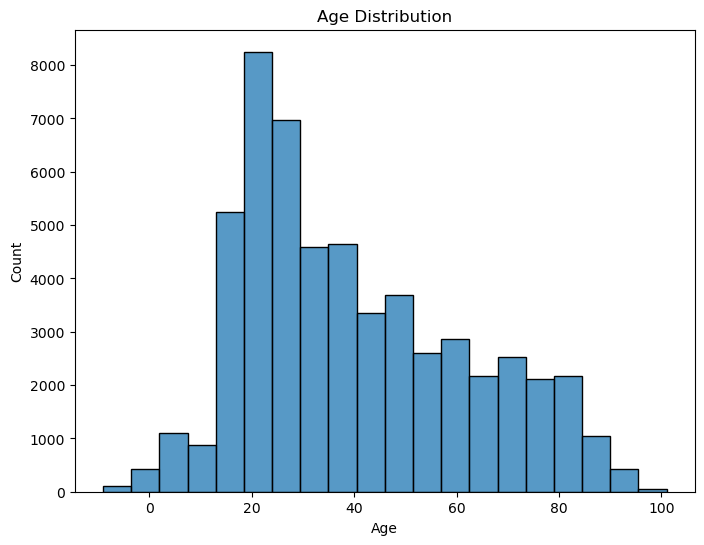

In [38]:
# Create a histogram of ages
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# NOTE # -9 represents a NaN and is creating the below '0' results, -9 will be cleaned out. 

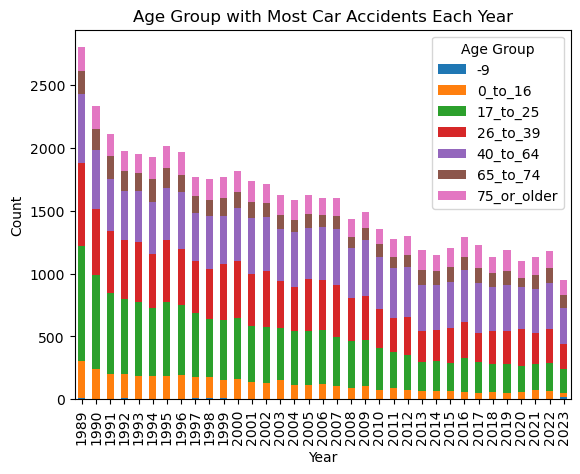

In [48]:
# What age group has the most likely car accidents each year?
age_group_yearly = merged_df.groupby(['Year', 'Age Group'])['Crash ID'].count().unstack()
age_group_yearly.plot(kind='bar', stacked=True)
plt.title('Age Group with Most Car Accidents Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# NOTE # -9 represents a NaN and will be cleaned out. 

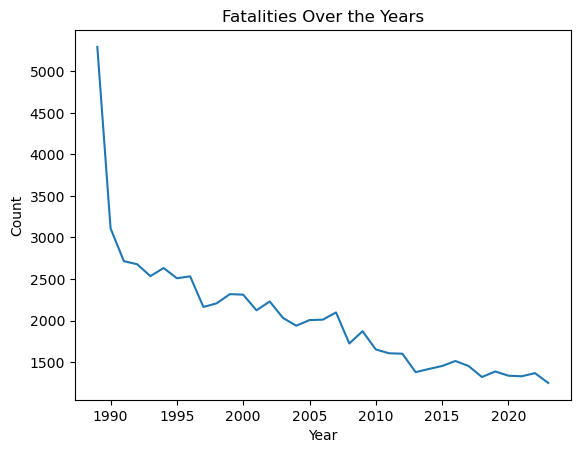

In [52]:
# Fatalities over years
fatalities_over_years = merged_df.groupby('Year')['Number of Fatalities'].sum()
fatalities_over_years.plot(kind='line')
plt.title('Fatalities Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


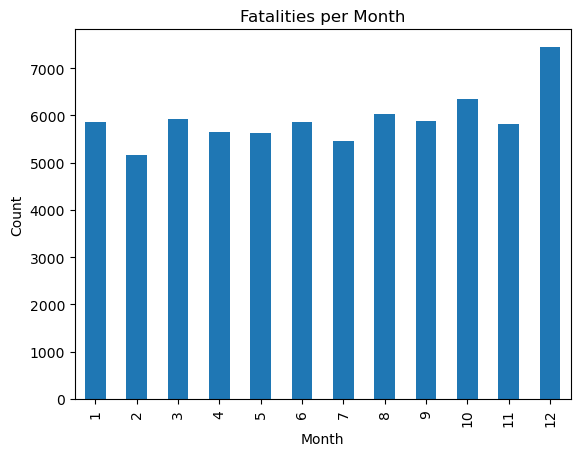

In [53]:
# Fatalities per month
fatalities_per_month = merged_df.groupby('Month')['Number of Fatalities'].sum()
fatalities_per_month.plot(kind='bar')
plt.title('Fatalities per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



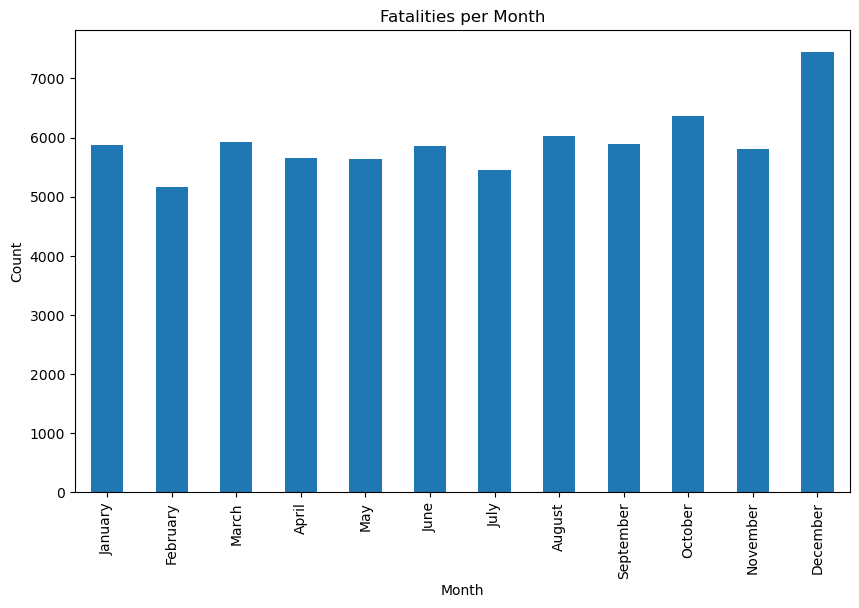

In [57]:
# Map month numbers to month names
fatalities_per_month.index = fatalities_per_month.index.map(lambda x: calendar.month_name[x])

plt.figure(figsize=(10, 6))
fatalities_per_month.plot(kind='bar')
plt.title('Fatalities per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


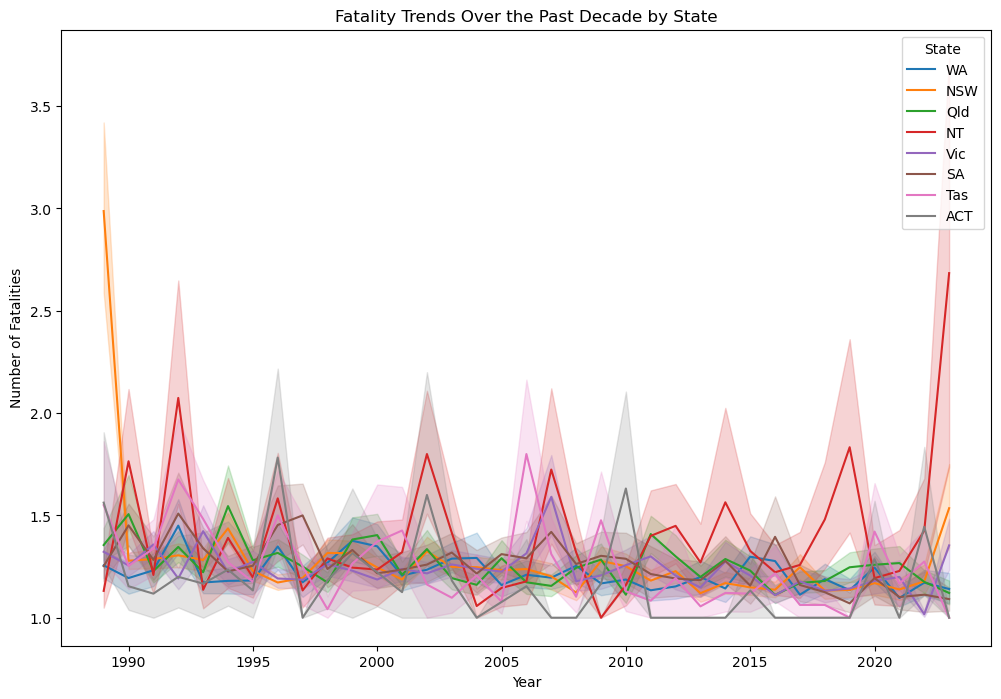

In [40]:
# Number of fatalities over the years for each state
# Create a line plot for fatality trends by state over the past decade
plt.figure(figsize=(12, 8))
sns.lineplot(data=merged_df, x='Year', y='Number of Fatalities', hue='State')
plt.title('Fatality Trends Over the Past Decade by State')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend(title='State')
plt.show()


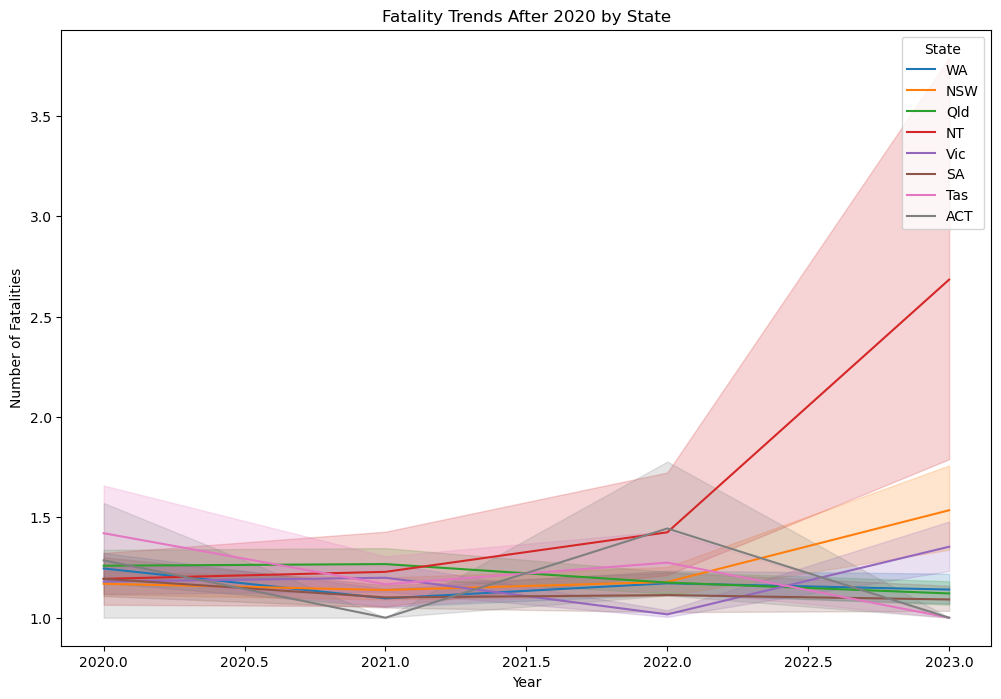

In [59]:
# Create a line plot that focuses only on the years after 2020.
plt.figure(figsize=(12, 8))
recent_years_df = merged_df[merged_df['Year'] >= 2020]
sns.lineplot(data=recent_years_df, x='Year', y='Number of Fatalities', hue='State')
plt.title('Fatality Trends After 2020 by State')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend(title='State')
plt.show()


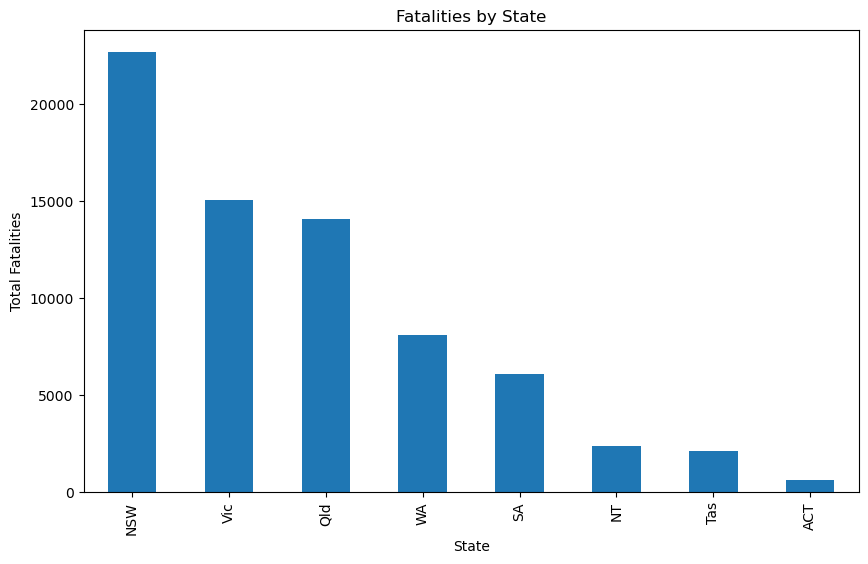

In [51]:
# Highest fatality per state
state_fatality = merged_df.groupby('State')['Number of Fatalities'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
state_fatality.plot(kind='bar')
plt.title('Fatalities by State')
plt.xlabel('State')
plt.ylabel('Total Fatalities')
plt.show()


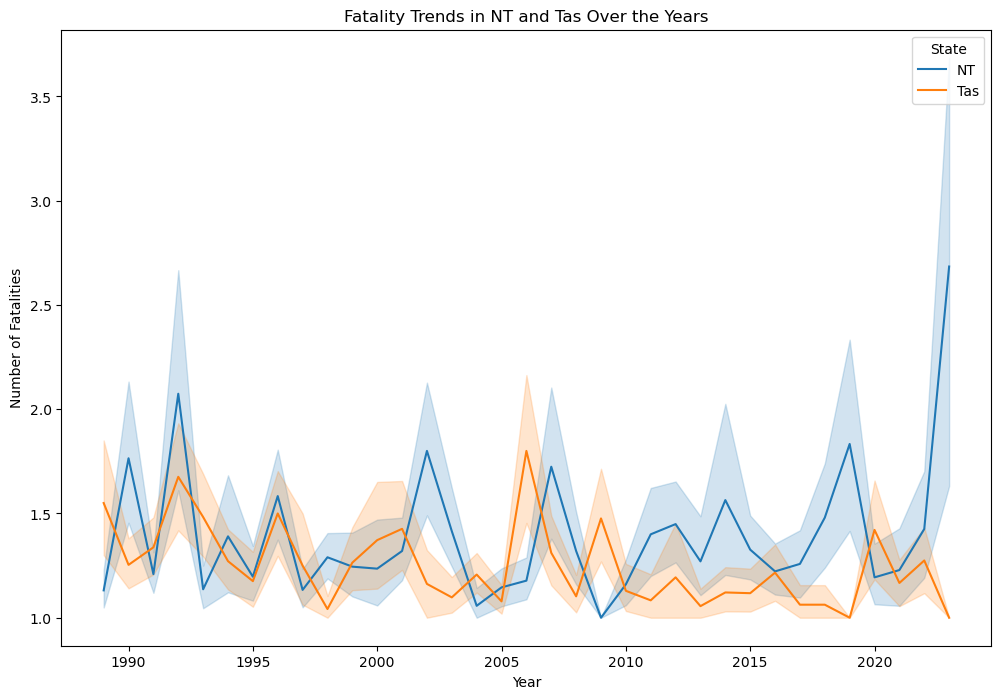

In [60]:
# Create separate line plots for NT and Tas
plt.figure(figsize=(12, 8))
nt_df = merged_df[merged_df['State'] == 'NT']
sns.lineplot(data=nt_df, x='Year', y='Number of Fatalities', label='NT')
tas_df = merged_df[merged_df['State'] == 'Tas']
sns.lineplot(data=tas_df, x='Year', y='Number of Fatalities', label='Tas')
plt.title('Fatality Trends in NT and Tas Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend(title='State')
plt.show()


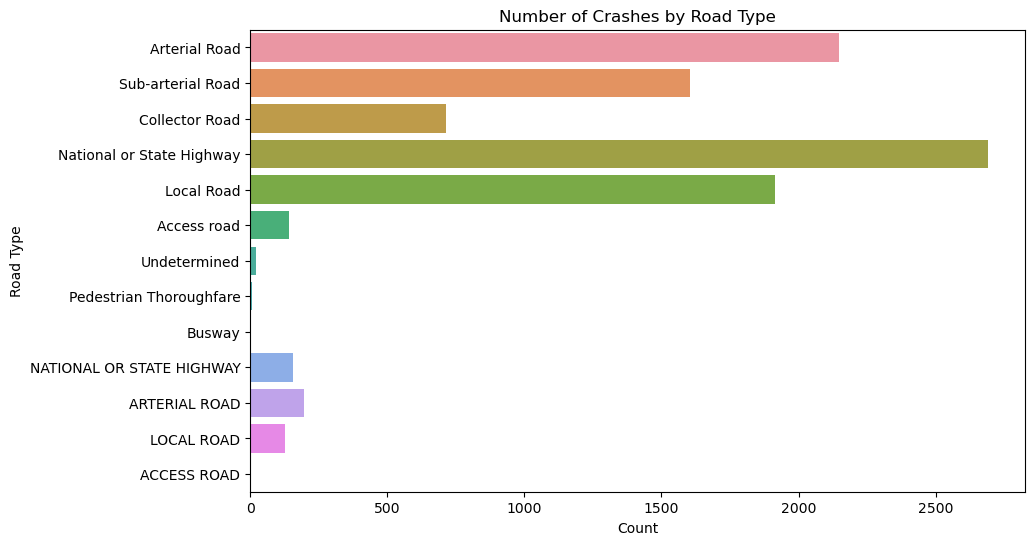

In [41]:
# Create a bar chart to show the number of crashes by road type
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, y='National Road Type')
plt.title('Number of Crashes by Road Type')
plt.xlabel('Count')
plt.ylabel('Road Type')
plt.show()


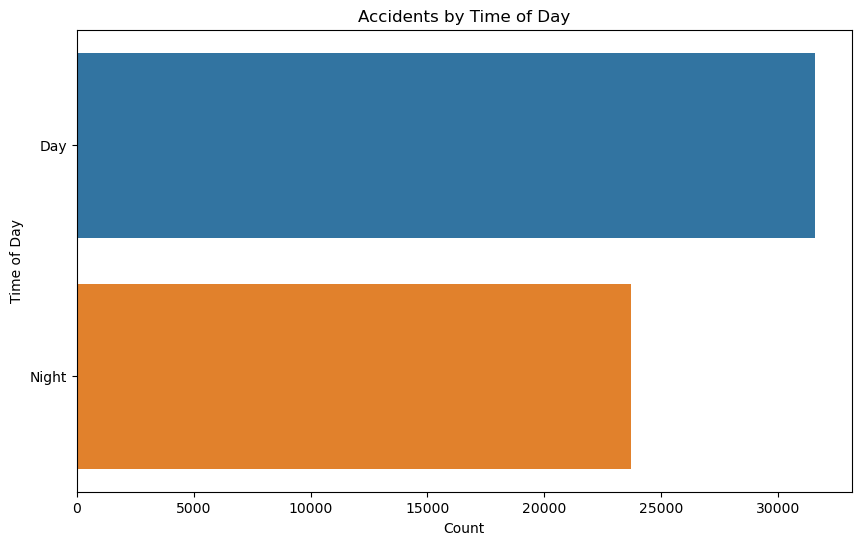

In [43]:
# Create a bar chart to show the distribution of accidents by time of day
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, y='Time of Day')
plt.title('Accidents by Time of Day')
plt.xlabel('Count')
plt.ylabel('Time of Day')
plt.show()


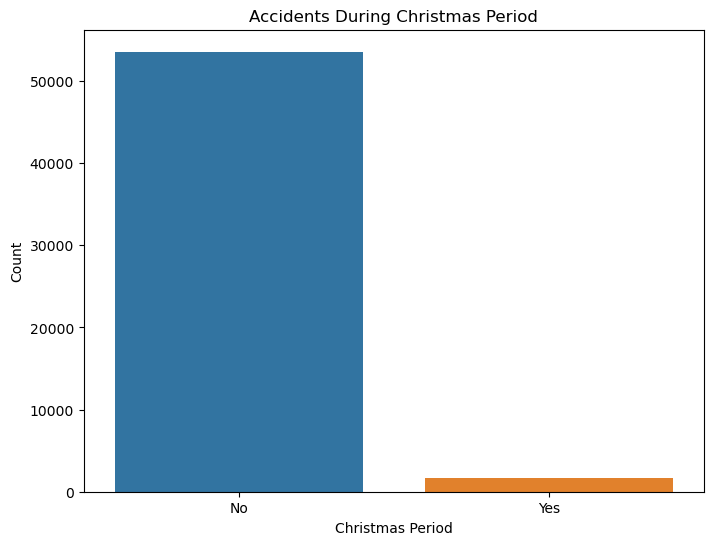

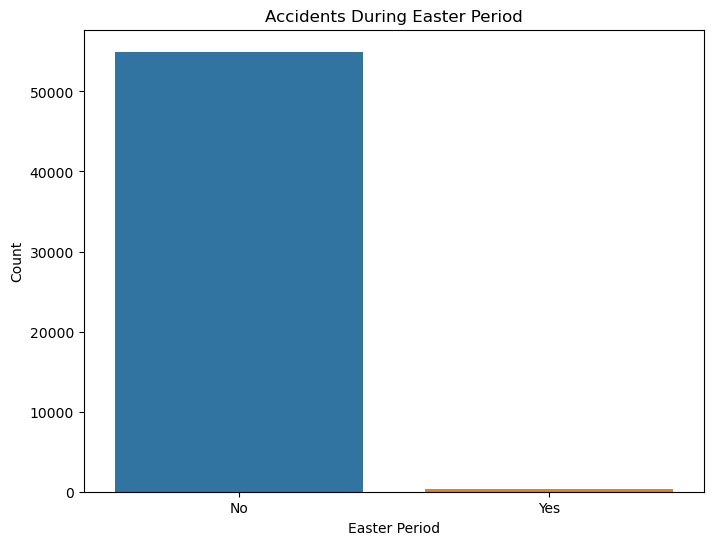

In [44]:
# Create a bar chart to show the distribution of accidents during Christmas and Easter periods
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Christmas Period')
plt.title('Accidents During Christmas Period')
plt.xlabel('Christmas Period')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Easter Period')
plt.title('Accidents During Easter Period')
plt.xlabel('Easter Period')
plt.ylabel('Count')
plt.show()


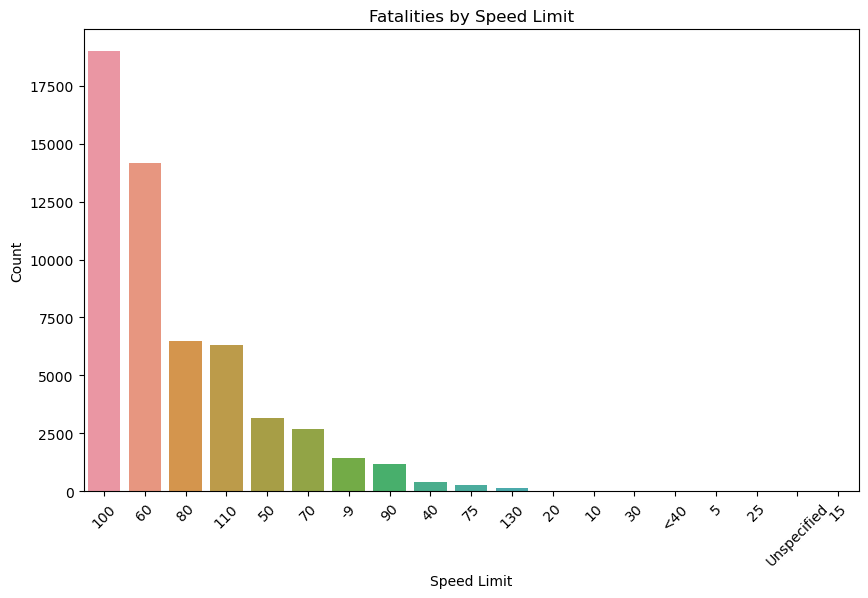

In [54]:
# Fatalities by Speed Limit
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Speed Limit', order=merged_df['Speed Limit'].value_counts().index)
plt.title('Fatalities by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
